## Clustering jerarquico
### Andrea Julieth Sosa Rodriguez, Tomas Barrios Guevara, Daniel Santiago Riveros Rodriguez

#### **Si tenemos muchos datos y no sabemos a qué grupo pertenecen, ¿cómo los organizamos de manera lógica?** 

Para esto existe el Clustering Jerárquico, una técnica de aprendizaje no supervisado que:

- Agrupa los datos en un árbol de clústeres anidados.

- Permite visualizar relaciones y similitudes entre los datos.

- Nos ayuda a descubrir patrones ocultos en conjuntos grandes de información.

- Agrupa los datos sin imponer un orden lineal dentro de estos.

En otras palabras, el clustering jerárquico es una forma de clasificar sin etiquetas previas, construyendo estructuras que revelan cómo se conectan los datos entre sí.



### Métodos de Clustering Jerárquico

Existen dos enfoques principales en el clustering jerárquico:

🔹 **Aglomerativo (Ascendente / Bottom-Up)**

- Cada dato inicia como un clúster independiente.

- Luego, en cada iteración, se busca el par de clústeres más cercanos (según una métrica de distancia) y se fusionan en un único grupo.

- El proceso continúa hasta que todos los datos quedan en un solo clúster que los contiene a todos.

- Es el método más usado en la práctica, ya que está implementado en librerías como scipy y scikit-learn.

**Ejemplo**
Imagina que tienes muchas piezas de un rompecabezas. Al inicio están todas separadas. En cada paso unes las piezas que encajan mejor, hasta que al final tienes la imagen completa.

**Ventajas ✅**

Sencillo de entender e implementar.

Produce un dendrograma fácil de interpretar.

**Desventajas ❌**

Puede ser costoso en tiempo computacional si hay demasiados datos.

🔹 **Divisivo (Descendente / Top-Down)**

- A diferencia del aglomerativo, este comienza con todos los datos en un único clúster grande.

- En cada paso, se divide ese grupo en subgrupos más pequeños, hasta que cada dato queda separado en su propio clúster.

- Es menos utilizado porque requiere técnicas más complejas para decidir cómo dividir los grupos.

**Ejemplo**
Imagina que ya tienes el rompecabezas armado. En cada paso lo vas separando en secciones más pequeñas, hasta que cada pieza está por separado.

**Ventajas ✅**

Puede ser más eficiente en ciertos contextos, cuando es más fácil detectar grandes diferencias primero.

**Desventajas ❌**

Es más difícil de implementar.

No está tan disponible en librerías estándar.



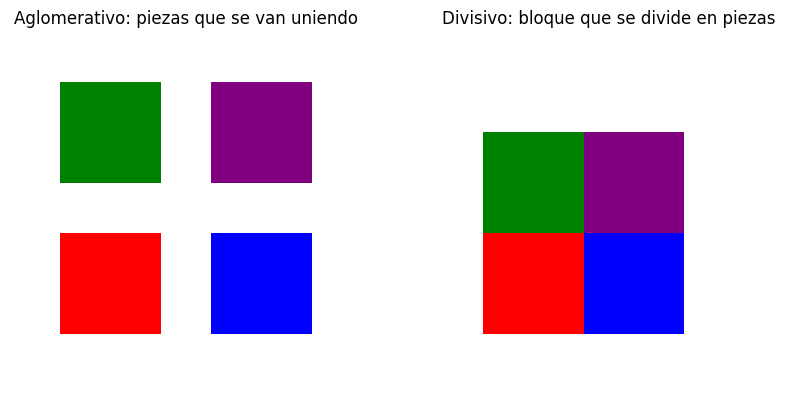

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_puzzle(ax, mode="aglomerativo"):
    # Colores y posiciones de las piezas
    colors = ["red", "blue", "green", "purple"]
    positions = [(0, 0), (1, 0), (0, 1), (1, 1)]
    
    if mode == "aglomerativo":
        # Piezas separadas
        for (x, y), c in zip(positions, colors):
            ax.add_patch(patches.Rectangle((x*1.5, y*1.5), 1, 1, facecolor=c))
        ax.set_title("Aglomerativo: piezas que se van uniendo")
    else:
        # Piezas juntas en bloque
        idx = 0
        for (x, y) in positions:
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=colors[idx]))
            idx += 1
        ax.set_title("Divisivo: bloque que se divide en piezas")
    
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect("equal")
    ax.axis("off")

# Crear figura con las dos versiones
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

draw_puzzle(axes[0], "aglomerativo")
draw_puzzle(axes[1], "divisivo")

plt.show()


## Visualización con Dendrograma

Un dendrograma es la representación gráfica en forma de árbol que muestra:

- El orden en que se fusionan o dividen los clústeres.

- La distancia o similitud entre los datos.

**Un dendrograma también se puede entender como una lista anidada de listas con distintos atributos**

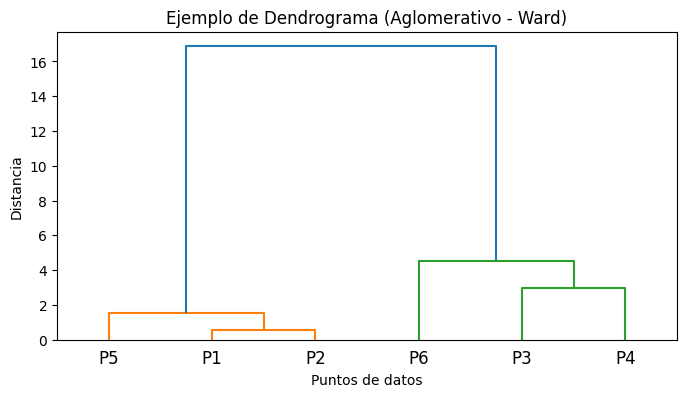

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# Clustering jerárquico aglomerativo con el método 'ward'
Z = linkage(X, method='ward')

# Graficar dendrograma
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Ejemplo de Dendrograma (Aglomerativo - Ward)")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()




## Cómo interpretar un dendrograma?

Elementos principales

- Eje X → Los datos u observaciones (por ejemplo: P1, P2, P3…).

- Eje Y → La distancia o disimilitud entre los clústeres cuando se unen.

- Ramas → Cada línea horizontal representa la unión de dos clústeres.

- Altura de la unión → Cuanto más arriba ocurre la unión, menos similares son los grupos que se juntan.


### interpretacion del ejemplo

- P1 y P2 se asemejan más entre ellos que con el resto → se unen en una rama a baja altura.

- P3 y P4 también forman un clúster propio, pero a una altura un poco mayor → lo que significa que son menos parecidos entre sí que P1 y P2.

- P5 se une después con P1 y P2 → indicando que está más cerca de ese grupo que de P3 y P4.

- P6 queda aislado hasta el final y se une a gran altura → lo que indica que es el dato más diferente de todos.

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Ellipse

# --- Subplot 2: Visualización en XY con óvalos ---
cluster_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster_model.fit_predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=100, edgecolor="k")

# Dibujar óvalos alrededor de cada clúster
for cluster_id in np.unique(labels):
    cluster_points = X[labels == cluster_id]
    mean = cluster_points.mean(axis=0)
    cov = np.cov(cluster_points, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', facecolor='none', lw=2)
    axes[1].add_patch(ellipse)

axes[1].set_title("Visualización de Clústeres en XY")
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")

plt.tight_layout()
plt.show()

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given